In [1]:
print("Program to implement a decision tree and display it")

Program to implement a decision tree and display it


In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)

In [4]:
df['target'] = pd.Series(iris.target)

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [6]:
df['target_names'] = df['target'].apply(lambda y:iris.target_names[y])

In [7]:
df_train.shape[0]

105

In [8]:
df_test.shape[0]

45

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()

X_train = df_train[iris.feature_names]
X_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_test_pred = clf.predict(X_test)
print(y_test_pred)

[2 1 0 1 1 0 1 1 0 1 2 0 2 2 1 2 2 0 2 0 2 0 1 1 0 2 0 2 1 1 2 0 2 0 0 0 1
 2 0 2 1 0 2 1 2]


In [13]:
from sklearn.tree import export_text
from sklearn import tree
import matplotlib.pyplot as plt

In [14]:
text_representation = export_text(clf)

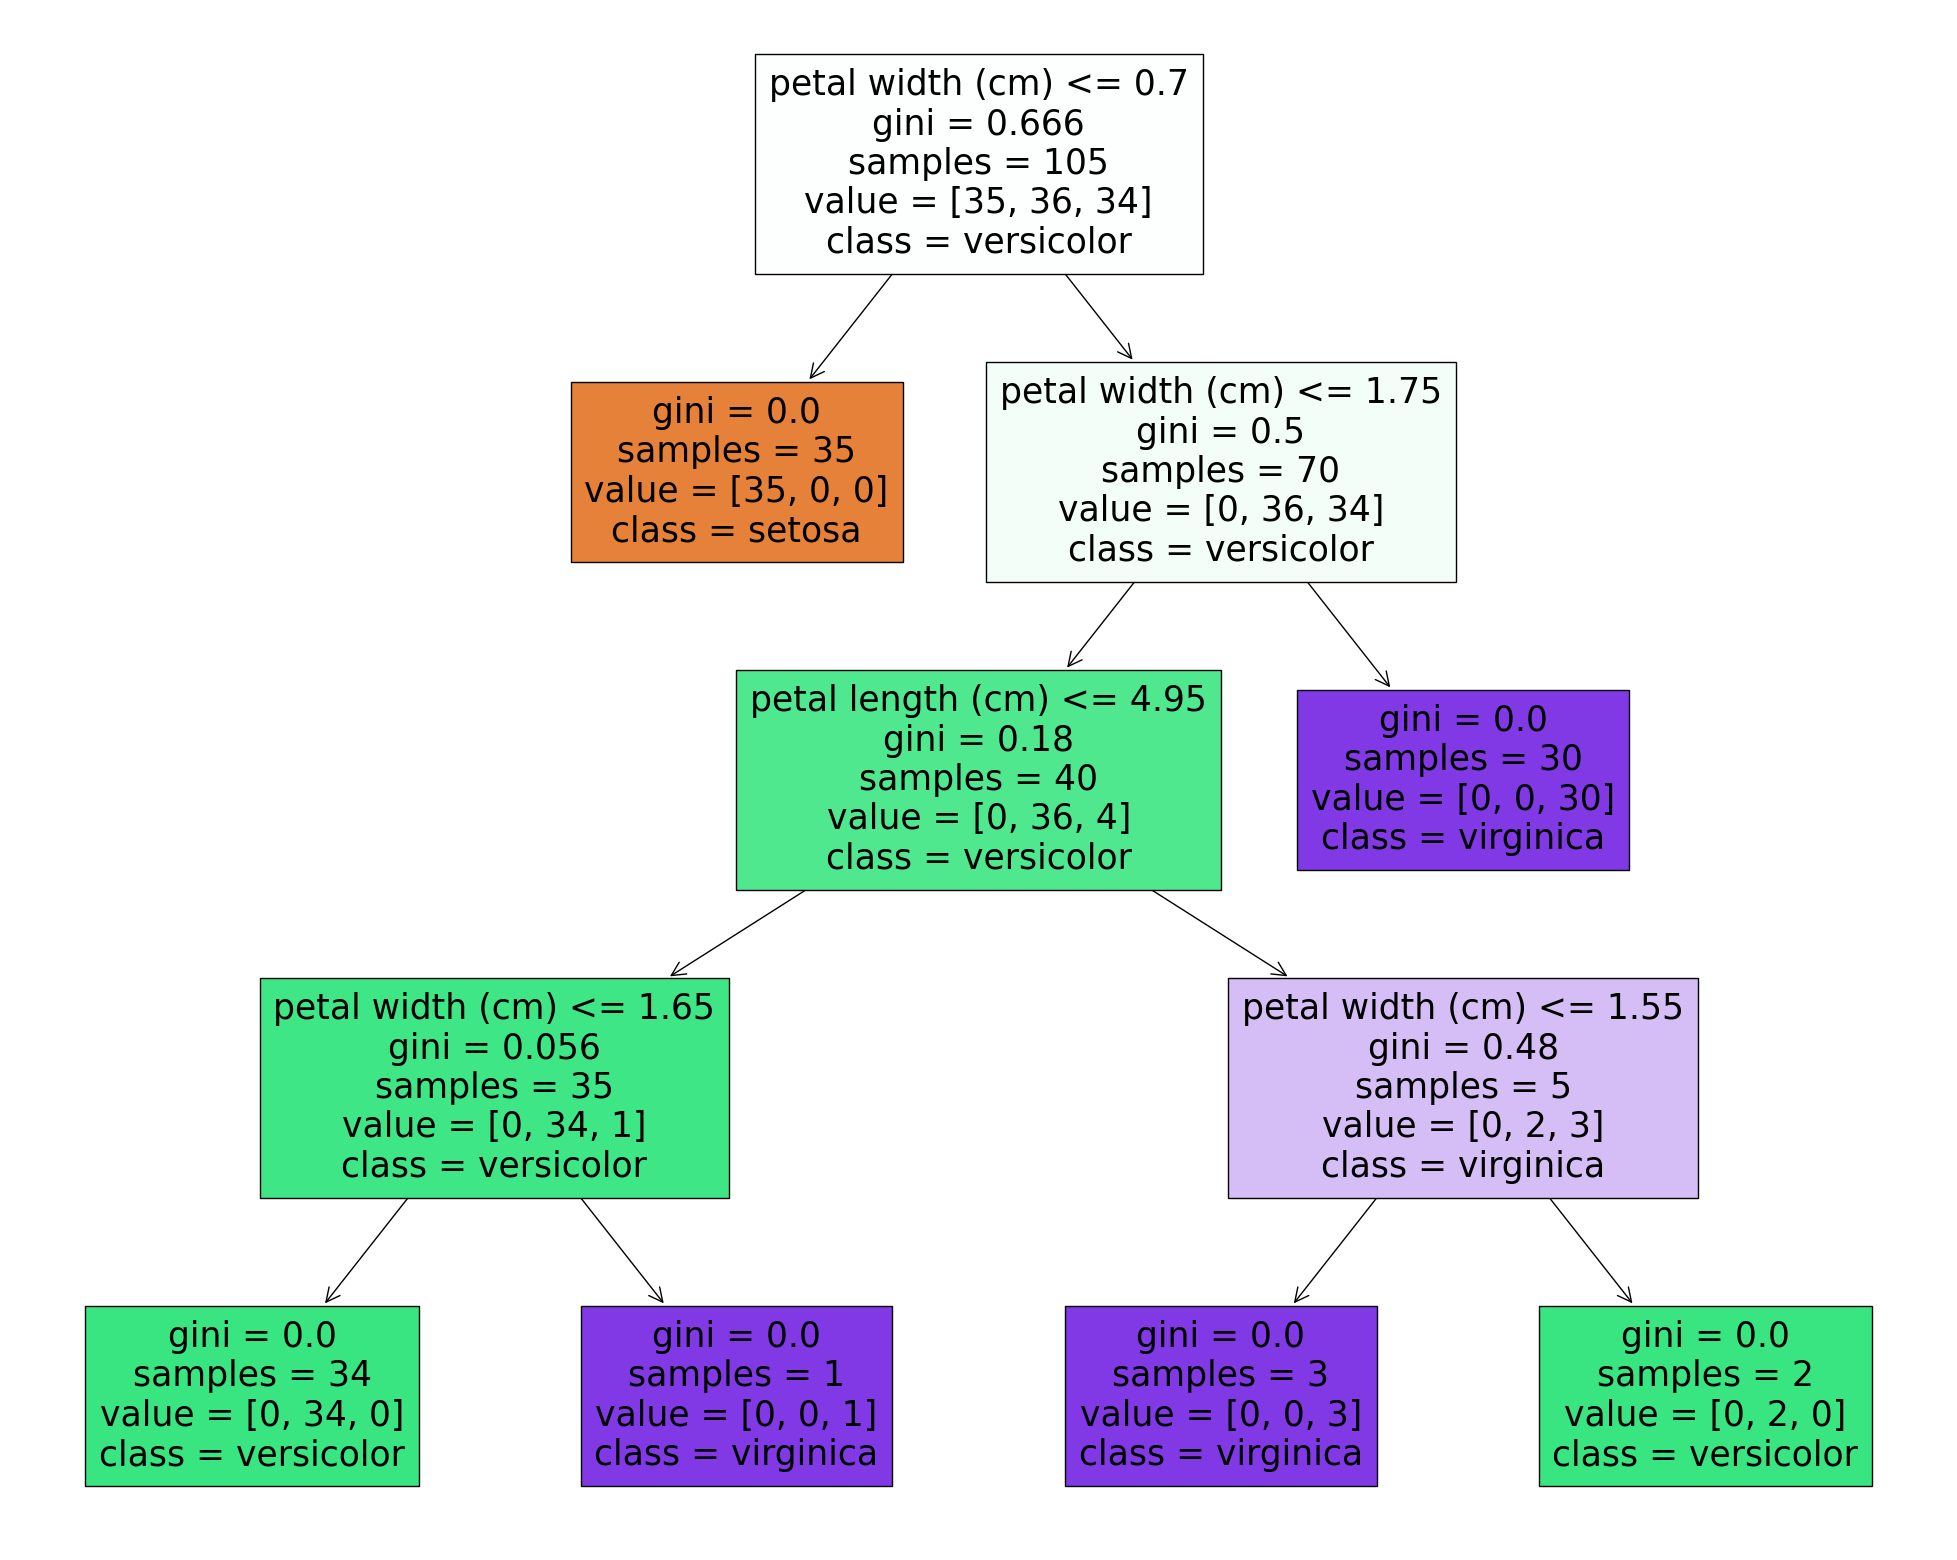

In [15]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled=True)

In [16]:
fig.savefig("decision_tree.png")

In [17]:
print("Program to calculate accuracy of decision tree")

Program to calculate accuracy of decision tree


In [18]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = pd.Series(iris.target)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.3)
df['target_names'] = df['target'].apply(lambda y : iris.target_names[y])

In [19]:
df_train.shape[0]

105

In [20]:
df_test.shape[0]

45

In [21]:
print(y_test_pred)

[2 1 0 1 1 0 1 1 0 1 2 0 2 2 1 2 2 0 2 0 2 0 1 1 0 2 0 2 1 1 2 0 2 0 0 0 1
 2 0 2 1 0 2 1 2]


In [22]:
from sklearn.metrics import accuracy_score

x = accuracy_score(y_test, y_test_pred)
print(x)

0.9555555555555556


In [23]:
import numpy as np
n=200

height_pop1_f = np.random.normal(loc = 155, scale=10, size =n)
height_pop1_m = np.random.normal(loc = 175, scale=5, size =n)

height_pop2_f = np.random.normal(loc = 165, scale=10, size =n)
height_pop2_m = np.random.normal(loc = 185, scale=5, size =n)

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [25]:
df_height = pd.DataFrame(
    {
        'Gender' : [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height' : np.concatenate((height_f, height_m))
    }
)

In [26]:
df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       160.5  159.8
2       179.7  179.1

In [27]:
df_train, df_test = train_test_split(df_height, test_size = 0.3)
X_train, X_test = df_train[['Gender']], df_test[['Gender']]
y_train, y_test = df_train['Height'], df_test['Height']

print(df_train)
print(df_test)

     Gender      Height
662       2  181.975120
215       1  175.870247
739       2  185.249478
67        1  152.637990
701       2  181.127761
..      ...         ...
711       2  183.570580
437       2  180.280941
356       1  146.221467
578       2  177.677028
83        1  170.422703

[560 rows x 2 columns]
     Gender      Height
482       2  177.059751
15        1  143.034396
588       2  172.224821
659       2  178.005697
154       1  175.188305
..      ...         ...
743       2  186.209335
32        1  156.805038
407       2  177.659938
239       1  167.371787
543       2  176.726704

[240 rows x 2 columns]


In [28]:
for criterion in ['squared_error', 'absolute_error']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(X_train, y_train)
    print(f"Criterion={criterion}:\n")
    print(export_text(rgrsr, feature_names = ['Gender'], spacing = 3, decimals=1))
    print("Program Executed Successfully")

Criterion=squared_error:

|--- Gender <= 1.5
|   |--- value: [160.6]
|--- Gender >  1.5
|   |--- value: [180.0]

Program Executed Successfully
Criterion=absolute_error:

|--- Gender <= 1.5
|   |--- value: [159.4]
|--- Gender >  1.5
|   |--- value: [180.1]

Program Executed Successfully
